In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [15]:
# Import data
data = pd.read_csv('/content/drive/Othercomputers/My Laptop/Kuliah/SEMESTER 3/Pengantar Data Sains/Pengantar-Data-Sains-2023/Project MID/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
# mengubah elemen dalam data agar mudah di hitung
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({
    'No':0,
    'Yes':1,
})

In [21]:
# Menetapkan kolom sebagai variabel
X = data.iloc[:,0:5]
y = data.iloc[:,-1]     # kolom yang jadi target 'Performance Index'

In [22]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [23]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [25]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k='all') # mengambil 10 KBest terbaik dengan perhitungan chi square
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [26]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Performances']  #naming the dataframe columns
print(featureScores.nlargest(10,'Performances'))  #print 10 best features

                          Variables  Performances
1                   Previous Scores  36878.998217
0                     Hours Studied   2741.620002
4  Sample Question Papers Practiced    184.462391
2        Extracurricular Activities     62.627417
3                       Sleep Hours     53.634446


In [27]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1130618  0.43991872 0.02398127 0.15718096 0.26585725]


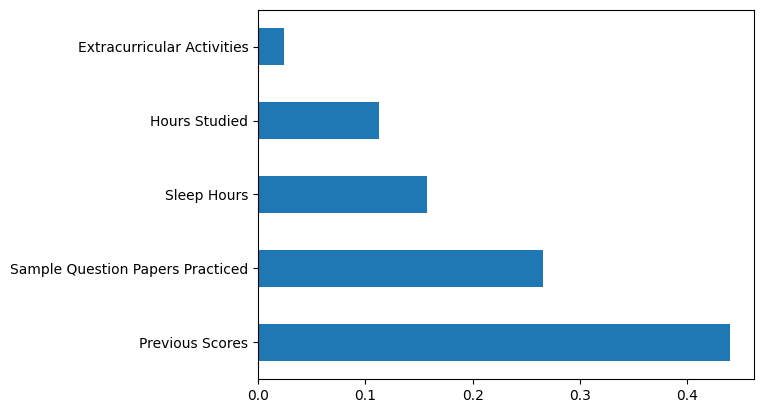

In [28]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr(numeric_only=True)
top_corr_features = corrmat.index

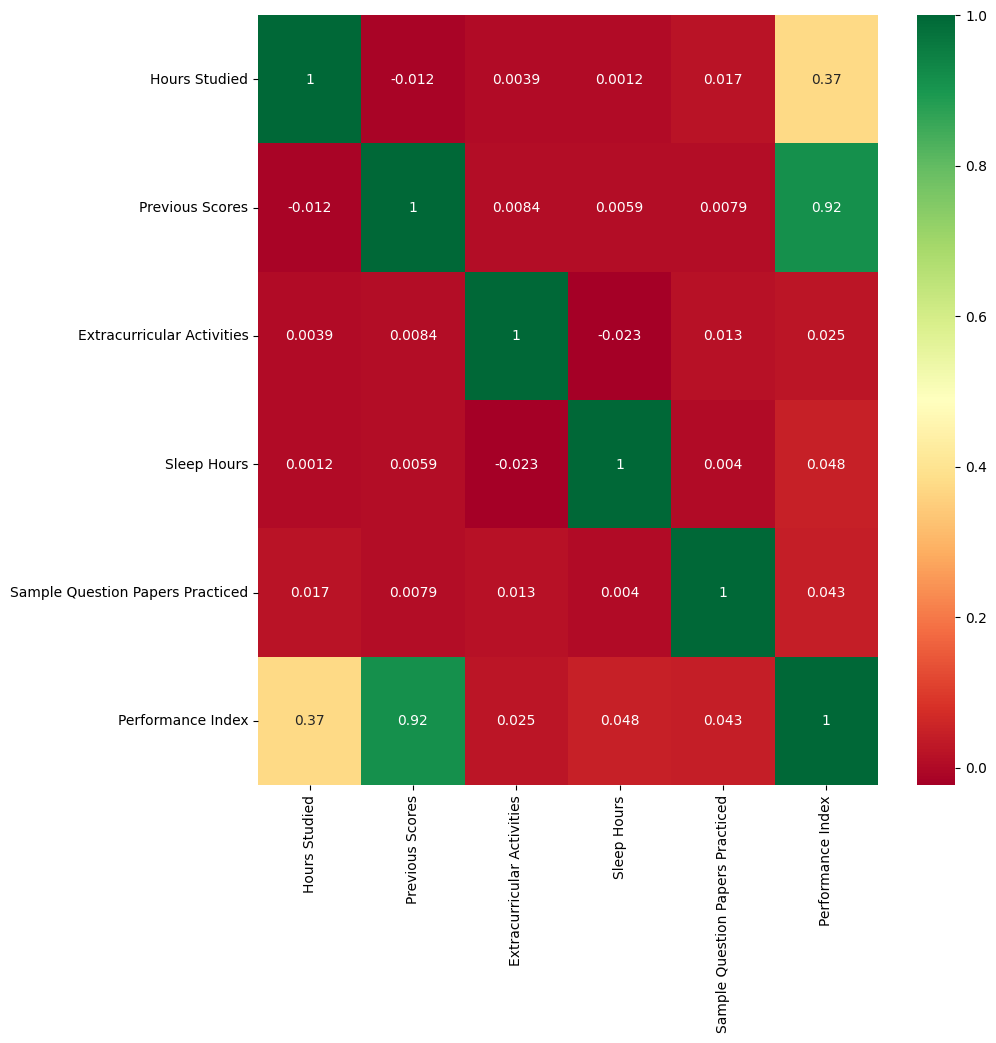

In [31]:
# plot heatmap
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan
